# Your Data Mining Pilot Study and Plan

## Background

The New York Times is one of the world’s most circulated newspapers with a history dating back to 1851. A lot has changed in society during the 150 plus year history of The Times, but few things have gained as much attention as the portrayal of women in media. Ever since the recent gender equality discussion (Carlsen, A., Salam, M., Miller, C.C., Lu, D. Ngu, A. Patel, J.K., & Wichter, Z., 2018) change seems to have sped up. It's become increasingly important for newspapers to be mindful of the way they represent women, in order to stay relevant and, perhaps most importantly, not suffer backlash resulting in damage to their image and credibility.

## Problem description

With the recent surge in coverage of media and its treatment of women, the New York Times is interested in looking at the optics of their own publications as it relates to gender. Looking back through history, they are interested in their difference in coverage of male and female subjects, as well as how this relates to the gender of the author.
Our first inquiry relates to how journalists affect the content and coverage that they deliver. According to a study by Armstrong, “the gender of the newswriter can be linked to gender portrayals within news stories.” (Armstrong, C.L., 2008) It suggests that the gender of selected sources and individuals that get covered is related to that of the journalist. Looking at NYT’s publications, we will examine if such a correlation can be found and how this might affect hiring decisions in the future.
Our second question pertains to the representation of women subjects in articles and other news items. According to Collins, Rebecca L. (Sex Roles; New York Vol. 64, Iss. 3-4) women are under-represented across a range of media and settings, including newspapers. Secondly when they are portrayed it is often in a negative manner. We want to research how the representation of women, in articles published by New York Times, has changed over the last 150 years. By doing so we can help NYT understand where they stand right now as it relates to gender representation, and how they have progressed over the years.

## Data collection

The data is collected through the New York Times "Archive API" in the form of JSON files which we convert to CSV files externally. The API provides distinct data such as lead paragraphs, titles, authors and occasionally abstracts from articles dating back to 1851. Rather than looking at the entire body of work we have decided to sample the article data for this pilot study. We will only gather data from the time period 1970 to 2017, mainly because of computation reasons. In this sample we will collect all the articles published during March, June and September to keep down the amount of articles. Although sampling the data heavily we still have a dataset containing X articles. To keep computation time and amount of requests down we have "cached" the data by saving it to a file which we host at RANDOM CDN.

In [5]:
import pandas as pd
import numpy as np
import json
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
from urllib.request import urlopen
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
# the following two lines set up our visualization settings
%matplotlib inline
matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
import seaborn as sns

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


ModuleNotFoundError: No module named 'nltk'

In [44]:
nyt_papers = []
year_span = range(1970,1999, 1)
print(year_span)
collection_number = 1
for year in year_span:
    
    collection = pd.read_json("http://api.nytimes.com/svc/archive/v1/" + str(year) + "/6.json?api-key=3475fe1ced244ca4b538864e094890c5")
    nyt_papers.append(pd.DataFrame(collection.response.docs).lead_paragraph)
    print(type((pd.DataFrame(collection.response.docs).lead_paragraph)))
    
    print(year)
    print(str(collection_number) + "/" + str(len(year_span)) + " collections loaded")
    collection_number = collection_number + 1

# Used to gather multiple collections (1 collection = 1 month worth of news papers)

range(1970, 1999)
<class 'pandas.core.series.Series'>
1970
1/29 collections loaded
<class 'pandas.core.series.Series'>
1971
2/29 collections loaded
<class 'pandas.core.series.Series'>
1972
3/29 collections loaded
<class 'pandas.core.series.Series'>
1973
4/29 collections loaded
<class 'pandas.core.series.Series'>
1974
5/29 collections loaded
<class 'pandas.core.series.Series'>
1975
6/29 collections loaded
<class 'pandas.core.series.Series'>
1976
7/29 collections loaded
<class 'pandas.core.series.Series'>
1977
8/29 collections loaded
<class 'pandas.core.series.Series'>
1978
9/29 collections loaded
<class 'pandas.core.series.Series'>
1979
10/29 collections loaded
<class 'pandas.core.series.Series'>
1980
11/29 collections loaded
<class 'pandas.core.series.Series'>
1981
12/29 collections loaded
<class 'pandas.core.series.Series'>
1982
13/29 collections loaded
<class 'pandas.core.series.Series'>
1983
14/29 collections loaded
<class 'pandas.core.series.Series'>
1984
15/29 collections loaded
<

In [2]:
nyt_papers = []

# Only gather data from our selected time period 1970-2017.
year_span = range(1970,2017, 1)
print(year_span)
collection_number = 1
for year in year_span:
    # Get three samples for each year containing all the articles for the three different months.
    collection = pd.DataFrame
    sample1 = pd.read_json("http://api.nytimes.com/svc/archive/v1/" + str(year) + "/3.json?api-key=c86bad0043d3407ebc5869abd10dade4")
    if(hasattr(pd.DataFrame(sample1.response.docs), 'lead_paragraph')):
        sample1 = pd.DataFrame(sample1.response.docs).lead_paragraph
    
    sample2 = pd.read_json("http://api.nytimes.com/svc/archive/v1/" + str(year) + "/6.json?api-key=c86bad0043d3407ebc5869abd10dade4")
    if(hasattr(pd.DataFrame(sample2.response.docs), 'lead_paragraph')):
        sample2 = pd.DataFrame(sample2.response.docs).lead_paragraph
        sample1.append(sample2, ignore_index=True)
    
    sample3 = pd.read_json("http://api.nytimes.com/svc/archive/v1/" + str(year) + "/9.json?api-key=c86bad0043d3407ebc5869abd10dade4")
    if(hasattr(pd.DataFrame(sample3.response.docs), 'lead_paragraph')):
        sample3 = pd.DataFrame(sample3.response.docs).lead_paragraph
        sample2.append(sample3, ignore_index=True)
    
    # Merge all three samples to one collection
    nyt_papers.append(sample1)
    print(str(collection_number) + "/" + str(len(year_span)) + " collections loaded")
    collection_number = collection_number + 1

# Used to gather multiple collections (1 collection = 1 month worth of news papers)

range(1970, 2017)


NameError: name 'pd' is not defined

In [112]:
paper_female_pronoun_count = 0
paper_male_pronoun_count = 0
paper_word_count = 0

articles_count = 0

female_pronoun_count_all_papers = []
male_pronoun_count_all_papers = []
word_count_all_papers = []

female_pronoun_count_percetange_all_papers = []
male_pronoun_count_percetange_all_papers = []

for collection in nyt_papers:
    for article in collection:        
        paper_female_pronoun_count = paper_female_pronoun_count + np.char.count(str(article), "Ms.")
        paper_female_pronoun_count = paper_female_pronoun_count + np.char.count(str(article), "Mrs.")
        paper_female_pronoun_count = paper_female_pronoun_count + np.char.count(str(article), " she ")
        paper_female_pronoun_count = paper_female_pronoun_count + np.char.count(str(article), "She ")
        
        paper_male_pronoun_count = paper_male_pronoun_count + np.char.count(str(article), "Mr.")
        paper_male_pronoun_count = paper_male_pronoun_count + np.char.count(str(article), " he ")
        paper_male_pronoun_count = paper_male_pronoun_count + np.char.count(str(article), "He ")

        paper_word_count = paper_word_count + len(str(article).split())

        articles_count = articles_count + 1
    female_pronoun_count_all_papers.append(paper_female_pronoun_count)
    male_pronoun_count_all_papers.append(paper_male_pronoun_count)
    word_count_all_papers.append(paper_word_count)
    
    female_pronoun_count_percetange_all_papers.append(paper_female_pronoun_count / paper_word_count)
    male_pronoun_count_percetange_all_papers.append(paper_male_pronoun_count / paper_word_count)
    
# Calculating the number of female vs male pronoun as total and percentages

In [181]:
paper_female_pronoun_count = 0
paper_male_pronoun_count = 0
paper_word_count = 0

female_positive_articles = []
female_negative_articles = []
female_neutral_articles = []
male_positive_articles = []
male_negative_articles = []
male_neutral_articles = []

articles_count = 0

female_pronoun_count_all_papers = []
male_pronoun_count_all_papers = []
word_count_all_papers = []

female_pronoun_count_percetange_all_papers = []
male_pronoun_count_percetange_all_papers = []
sid = SentimentIntensityAnalyzer()

for collection in nyt_papers:
    for article in paper:
        if(article):
            ss = sid.polarity_scores(article)
        _paper_female_pronoun_count = 0;
        _paper_female_pronoun_count = np.char.count(str(article), "Ms.")
        _paper_female_pronoun_count = np.char.count(str(article), "Mrs.")
        _paper_female_pronoun_count = np.char.count(str(article), " she ")
        _paper_female_pronoun_count = np.char.count(str(article), "She ")
        paper_female_pronoun_count = paper_female_pronoun_count + _paper_female_pronoun_count;
        
        _paper_male_pronoun_count = 0;
        paper_male_pronoun_count = np.char.count(str(article), "Mr.")
        paper_male_pronoun_count = np.char.count(str(article), " he ")
        paper_male_pronoun_count = np.char.count(str(article), "He ")
        paper_male_pronoun_count = paper_male_pronoun_count + _paper_male_pronoun_count;

        paper_word_count = paper_word_count + len(str(article).split())
        if(_paper_female_pronoun_count > _paper_male_pronoun_count):
            if(ss['compound'] > 0.3):
                female_positive_articles.append(article)
            elif(ss['compound'] < -0.3):
                female_negative_articles.append(article)
            else:
                female_neutral_articles.append(article)
        else:
            if(ss['compound'] > 0.3):
                female_positive_articles.append(article)
            elif(ss['compound'] < - 0.3):
                female_negative_articles.append(article)
            else:
                female_neutral_articles.append(article)
            
        articles_count = articles_count + 1

    female_pronoun_count_all_papers.append(paper_female_pronoun_count)
    male_pronoun_count_all_papers.append(paper_male_pronoun_count)
    word_count_all_papers.append(paper_word_count)
    
    female_pronoun_count_percetange_all_papers.append(paper_female_pronoun_count / paper_word_count)
    male_pronoun_count_percetange_all_papers.append(paper_male_pronoun_count / paper_word_count)
    
    paper_female_pronoun_count = 0
    paper_male_pronoun_count = 0
    paper_word_count = 0

In [172]:
year = []
for number in year_span:
    year.append(number)
df = pd.DataFrame({
    "Male": male_pronoun_count_all_papers, 
    "Male Percentage": male_pronoun_count_percetange_all_papers, 
    "Female": female_pronoun_count_all_papers,
    "Female Percentage": female_pronoun_count_percetange_all_papers
}, index=year)
df
# Graph showing number of pronouns found for respective gender

1292
30252


,Female,Female Percentage,Male,Male Percentage
1999,472,0.000652,0,0.0
2000,472,0.000652,0,0.0
2001,472,0.000652,0,0.0
2002,472,0.000652,0,0.0


16256
8044
7244


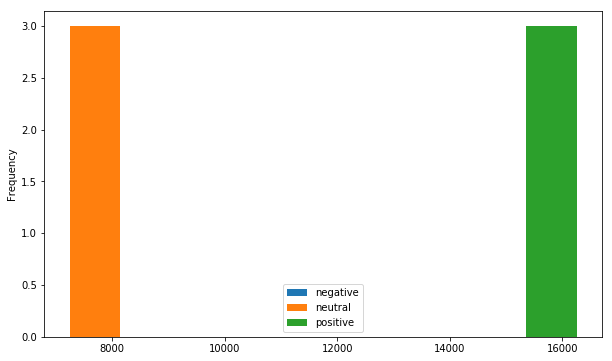

In [192]:
print(len(female_positive_articles))
print(len(female_negative_articles))
print(len(female_neutral_articles))
df = pd.DataFrame({'positive': len(female_positive_articles),
                    'negative': len(female_negative_articles),
                    'neutral': len(female_neutral_articles)},
                 index=["Positive", "Negative", "Neutral"])
plot = df.plot.hist()
plt.show()


4
4


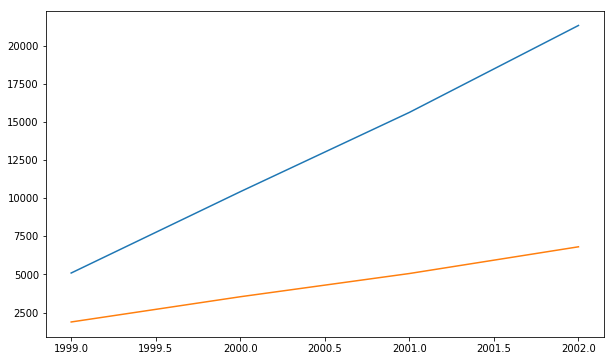

In [113]:
year = []
for number in year_span:
    year.append(number)
print(len(year))
print(len(male_pronoun_count_all_papers))
plt.plot(year, male_pronoun_count_all_papers, label="Male")
plt.plot(year, female_pronoun_count_all_papers, label="Female")
plt.show()
# Graph showing number of pronouns found for respective gender

[1999, 2000, 2001, 2002]
[0.007186403780863327, 0.007272224970158344, 0.007352650456098732, 0.007308968049280075]
[0.0026633542754661223, 0.0024710495821470505, 0.0023835747973679007, 0.0023366616904744435]


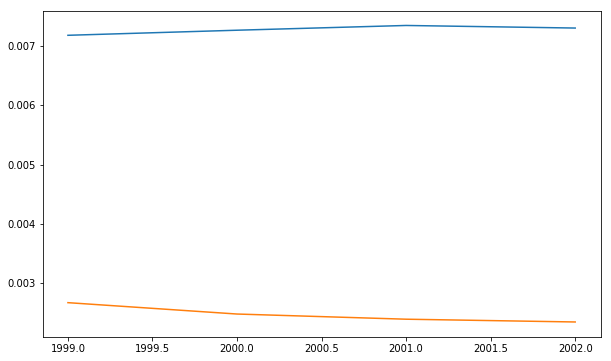

In [114]:
year= []
for number in year_span:
    year.append(number)

print(year)
print(male_pronoun_count_percetange_all_papers)
print(female_pronoun_count_percetange_all_papers)
plt.plot(year, male_pronoun_count_percetange_all_papers, label="Male")
plt.plot(year, female_pronoun_count_percetange_all_papers, label="Female")
plt.show()
# Graph showing percentage of words being pronouns for respective gender

In [156]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
for collection in nyt_papers:
    for article in collection:
        print(article)
        if(article):
            ss = sid.polarity_scores(article)
            print(ss)
            print()
            print()

Note: This lesson was originally published on an older version of The Learning Network; the link to the related Times article will take you to a page on the old site.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


* Rural Cellular Corp., Alexandria, Minn., to Ingalls, Boston, to handle its account, which had been divided among three agencies: Ad Media, Augusta, Me.; KSV, Burlington, Vt., and Russell & Herder, Brainerd, Minn. Billings were estimated at $5 million to $10 million.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


By all rights, this should be the perfect time to be a woman in medicine. The days of women toiling as a mostly unwelcome presence in the country's medical schools are long over: women now account for roughly 45 percent of all medical students, up from about 25 percent in 1980.
{'neg': 0.051, 'neu': 0.88, 'pos': 0.069, 'compound': 0.25}


Seven months after he announced that he was leaving office, President Carlos Saul Menem says he will run for re

{'neg': 0.014, 'neu': 0.836, 'pos': 0.15, 'compound': 0.9753}


Betty Roche, a singer who performed with Duke Ellington in the 1940's and 50's and was noted for her strong, dramatic delivery of blues material, died on Feb. 16 at the Mainland Manor Nursing and Rehabilitation Center in Pleasantville, N.J. She was 81. ''She had a soul inflection in a bop state of intrigue,'' Ellington wrote about Ms. Roche in his oblique style of praise, ''and every word was understandable despite the sophisticated hip and jive connotations.''
{'neg': 0.078, 'neu': 0.839, 'pos': 0.083, 'compound': 0.0966}


BERG-Wayne, FAIA. An enormous talent, a colleague of exquisite professionalism and a dear friend. He joined us in 1987 as design principal and has been an inestimable force in our lives and work. His achievement as an architect is reflected in his many important design awards, the extent of his published work, his election to 40 Under 40 and Emerging Voices, and his wide ranging service to the professi



DUBUS-Andre. Rest in peace. Comfort to your family. Bunny Dell, Ardent Fan
{'neg': 0.0, 'neu': 0.412, 'pos': 0.588, 'compound': 0.886}


ZARKIN-Ruth. Age 85, of Tamarac, FL. Passed away February 28, 1999, at her residence. She is survived by her husband Philip and her sons, daughter-in-law and grandchildren. Graveside services will be held Tuesday at 1:30 at the Beth David Cemetery in Elmont, NY. For information contact Riverside Chapel, 180 West 76th St., NYC, 212-362-6600.
{'neg': 0.032, 'neu': 0.911, 'pos': 0.058, 'compound': 0.3612}


The Devils found themselves two men short for 68 seconds early in the final period this afternoon at Continental Arena. To make matters worse, Scott Stevens, their captain and cornerstone of the penalty-killing unit, was sitting in the penalty box, next to Krzysztof Oliwa. The Devils were in serious trouble, but they escaped from that situation and went on to a 4-1 victory over the Phoenix Coyotes, thanks in large part to brilliant penalty-killing b

{'neg': 0.032, 'neu': 0.932, 'pos': 0.036, 'compound': 0.3567}


A 4-year-old boy who was left home alone by his father fell out a second-floor window in East Harlem yesterday and broke both legs, the police said.
{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'compound': -0.5859}


TRACHTENBERG-Rita. Beloved wife of Leo Trachtenberg, cherished mother of Daniel Trachtenberg, revered mother-in-law of Cari Pokrassa, loving grandmother of Allie Trachtenberg, died February 19, 1999. A memorial service will be held at the New York Society for Ethical Culture, 2 West 64th St, Ceremonial Hall, 4th Floor on Friday, February 26 at 12 noon.
{'neg': 0.054, 'neu': 0.69, 'pos': 0.256, 'compound': 0.926}


To the Editor: That President Clinton's legal defense fund has raised $4.6 million must be gratifying to the Clintons and the fund's organizers (news article, Feb. 24). Yet I would be curious to know if Mr. Clinton or his supporters have given any thought to helping with the legal bills, some quite subs

{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9201}


SKIR-Eugene D. On February 22, 1999, of East Northport, L.I. Beloved husband of Lenore. Devoted father of Linda, William and Robert. Dear brother of Leo. Services Wednesday, 1:30 PM at ''Gutterman's,'' 8000 Jericho Turnpike, Woodbury, L.I.
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.8225}


Hamza El Din, who has made his life's work reinterpreting the songs of his native region of Nubia on the oud, performed intense music with extreme quietude at Symphony Space on Saturday night in a concert presented by the World Music Institute. His music, which is an original mixture of Arabic structures and the rhythm-and-voice music of the upper Nile, has binding tonal centers; in some cases, he played drones. But his melodies skipped and jumped around lightly on top of them, changing their patterns of phrasing quite boldly from one stretch to the next.
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.8221}


SPENCER-F


A picture caption yesterday with a front-page article about the presidential election in Nigeria on Saturday described the election incorrectly. It was not Nigeria's first presidential vote in 16 years. A presidential election was held in 1993; its results were annulled by the military government.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


MAURER-Richard F., of NYC. Beloved father of Scott and David Maurer and Melinda A. Sawyer. Reposing at Krtil Funeral Home, 1297 1st Ave., NYC, Thursday, 12-3 PM. Funeral service private.
{'neg': 0.142, 'neu': 0.765, 'pos': 0.093, 'compound': -0.1779}


Responding to complaints from customers, Amazon.com retooled its popular on-line bookstore yesterday so that it would disclose when publishers pay money to subsidize titles that are highlighted or featured with favorable reviews. The Seattle-based company used a note on its home page to invite readers to ''learn about co-op placements,'' the jargon of the publishing industry for advertisi

{'neg': 0.048, 'neu': 0.811, 'pos': 0.141, 'compound': 0.987}


The construction company responsible for a brick that fell off the roof of a school building in Brooklyn last year and killed a 16-year-old girl was fined $10,000 yesterday by a judge, the District Attorney's office said. The company, Espo Construction of the Bronx, had pleaded guilty in September to second-degree manslaughter in the death of Yan Zhen Zhao. Ms. Zhao was walking with a friend past Public School 131 in Borough Park last Jan. 9 when a brick that was apparently being used to hold down a tarpaulin blew off and landed on her head. She died four days later.
{'neg': 0.138, 'neu': 0.811, 'pos': 0.051, 'compound': -0.8834}


STEVENSON-David Lee. On Monday, March 1, 1999. Of Bethesda, Maryland. Husband of Phoebe Stevenson. Father of Andrew Zachary. Son of Dorothy and Robert Stevenson. Brother of John and Philip Stevenson. A memorial service will be held on Thursday, March 4, 1999 at 3 P.M. at the National Presbyteria

{'neg': 0.021, 'neu': 0.861, 'pos': 0.119, 'compound': 0.9961}


SPERLING-Leon. On February 20, 1999. Survived by his wife Beverly, daughter Robin and her husband Harold and grandchildren Alexis and Danielle Roth of Lexington, KY. Funeral service on Tuesday, February 23, 10:00 AM, Schwartz Bros. in Queens.
{'neg': 0.061, 'neu': 0.858, 'pos': 0.081, 'compound': 0.2023}


After a woeful season fraught with internal strife, Manhattan College fired Coach John Leonard yesterday. Leonard, the seventh-leading scorer in school history, never had a .500 season in his three years as a coach -- he was 26-57 -- and this season went 5-22. After a first-round loss in the Metro Atlantic Athletic Conference tournament last Friday, the athletic director Bob Byrnes all but announced Leonard's departure.
{'neg': 0.09, 'neu': 0.91, 'pos': 0.0, 'compound': -0.5994}


'(Under)Cover Girls' Dance Theater Workshop At the beginning and end of ''(Under)Cover Girls,'' women held an enormous blanket. It came to sy

{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.8658}


LANGFAN-Barbara. Sutton Place Synagogue extends sympathies to our devoted members William and Marion Langfan on the loss of Bill's beloved sister and our longtime member. Condolences to the bereaved family. Allan Schranz, Rabbi Robert W. Berend, President
{'neg': 0.12, 'neu': 0.713, 'pos': 0.167, 'compound': 0.2732}


A hard-line political leader of the Kosovo Liberation Army resigned today, raising hopes among diplomats that the ethnic Albanian guerrilla movement will sign an autonomy plan proposed at peace talks last month. In southern Kosovo, meanwhile, Yugoslav tank and mortar fire pounded the hillsides along the Macedonian border, striking at rebel positions and driving thousands of ethnic Albanian civilians from their homes in some of the heaviest fighting since start of the peace talks at Rambouillet, France.
{'neg': 0.097, 'neu': 0.79, 'pos': 0.112, 'compound': 0.5106}


Upholding a complaint by the police union, a 

{'neg': 0.051, 'neu': 0.87, 'pos': 0.079, 'compound': 0.7245}


The AT&T Corporation said yesterday that it wanted to stop investing in traditional long-distance telephone systems by next year. In a conference call with reporters, Frank Ianna, president of AT&T's network operation, said the company intended to stop buying long-distance switches for traditional telephone calls made by Lucent Technologies Inc. and would redirect its annual capital spending of about $6 billion toward products based on Internet technology. He added that the company would continue to buy other Lucent products. AT&T also said yesterday that it would participate in a group formed by Lucent, Motorola and other companies to promote new uses for the Internet, such as services that read E-mail over the phone.
{'neg': 0.038, 'neu': 0.939, 'pos': 0.023, 'compound': -0.2023}


An article on Monday about the dismissal of the Chief of the New Jersey State Police, Col. Carl A. Williams, misstated the name of an Assembl


None
Jorge Posada was escorted into Brian Cashman's office at Legends Field after an intrasquad game today, knowing that he was about to learn how much the Yankees will pay him to be their starting catcher this season. Posada entered the fourth-floor office feeling hopeful and exited it feeling bitter. The Yankees told Posada they were renewing his contract for $350,000, giving the 27-year-old a raise of $100,000. But Posada was angry because he wanted the Yankees to pay him about $650,000, which would have been much closer to the $750,000 that Derek Jeter and Mariano Rivera earned last year with similar service time to Posada's 2 years 85 days.
{'neg': 0.076, 'neu': 0.849, 'pos': 0.075, 'compound': -0.0516}


An immigrant from India who prosecutors said built and protected a chain of lucrative gasoline stations with fraud and violence was convicted in Brooklyn yesterday of murder charges that could bring the death penalty. The defendant, Gurmeet Singh Dhinsa, 36, whose rise from car-

{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.8402}


An official of the RJR Nabisco Holdings Corporation said yesterday that the company was seeking to sell its international tobacco operations and had received bids from at least five other companies, including the Philip Morris Companies. The official, who spoke on condition of anonymity, said a winning bidder could emerge as early as this week, but added that the process could go on for longer.
{'neg': 0.0, 'neu': 0.966, 'pos': 0.034, 'compound': 0.296}


Norman Kotker, a novelist and historian, died on Feb. 24 at his home in Northampton, Mass. He was 67. The cause was pneumonia after years of multiple sclerosis, said his wife, the novelist Zane Kotker.
{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.5574}


NELSON-Franklin. 67. Passed away suddenly. Beloved son of the late Faye and Max, father of Ted (Arelis) and Julie, brother of Joel (Midge), uncle of Nicole (Bill) and Jennifer. Also survived by loving companion

{'neg': 0.097, 'neu': 0.736, 'pos': 0.167, 'compound': 0.8271}


Two top executives, including the chief operating officer, are leaving Mattel Inc. as part of a sweeping management reorganization announced today by the struggling toy maker. The company's second-ranking executive post -- that of chief operating officer, which is now held by Bruce L. Stein -- will be eliminated. Instead, Mattel said it would have five business products units headed by presidents who will report directly to Jill E. Barad, the chairwoman and chief executive.
{'neg': 0.037, 'neu': 0.94, 'pos': 0.023, 'compound': -0.25}


Eager to show that education is foremost on their minds, Senate Democrats and Republicans began a debate on Federal education policy today that they hope will resonate with voters weary of impeachment and partisan warfare. Intending to diminish negative reviews of the Republicans' handling of the impeachment trial, the Senate majority leader, Trent Lott of Mississippi, made it a point to br

{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'compound': 0.8176}


A storm carrying wind gusts of up to 40 miles per hour burst through the metropolitan region last night, blowing two 55-pound metal plates from an office building next to the Port Authority Bus Terminal and causing several floors of a vacant building in Harlem to cave in, the authorities said. Falling debris prompted the police to close parts of West 41st and 42d Streets between Eighth and Ninth Avenues for much of the evening commute and past midnight after the metal plates, which were on a construction area at 360 West 42d Street, were blown from the 35-story building and onto a neighboring building. The mishap disrupted bus service for a short time at the bus terminal, but no one was injured, the authorities said.
{'neg': 0.061, 'neu': 0.93, 'pos': 0.009, 'compound': -0.7579}


ALLEN-Anna Rearick (Nan). Died March 2, 1999 in Exeter, N.H. She was born on May 7, 1913 in Summit, N.J. and graduated from the Kent Place School

{'neg': 0.04, 'neu': 0.862, 'pos': 0.099, 'compound': 0.9849}


UNTIL Greg LeMond showed that an American could win the Tour de France, following professional cycle racing from the United States was a desperate business. Race results from the tour and other races like the Giro D'Italia and the Tour of Flanders typically came weeks, if not months, late through the pages of outrageously overpriced European magazines like the old Miroir du Cyclisme. Mr. LeMond's extraordinary success -- he won the Tour de France three times, first in 1986 -- unquestionably increased cycling coverage, both in print and on television. But despite that, timely reporting remained largely concentrated on just the Tour de France. Now the Web has changed all that.
{'neg': 0.036, 'neu': 0.798, 'pos': 0.167, 'compound': 0.9485}


CORSER-Paul. The Senior Program Officer of the American Foundation for AIDS Research (amfAR), died Monday, Jan. 4, 1999. A Memorial will be held on Saturday, Mar. 13th at 4pm in the audit

{'neg': 0.024, 'neu': 0.939, 'pos': 0.037, 'compound': 0.1548}


The Alabama Legislature dissolved into chaos and paralysis this week as the state's newly elected Lieutenant Governor, a Republican, used a quick gavel on Tuesday to snatch power from the Democratic majority in the state Senate. The coup in Montgomery incited such ear-splitting animus on the Senate floor that a 5-year-old visitor was reduced to tears. It led a Democratic leader to call the Lieutenant Governor, Steve Windom, ''a madman'' and to talk of impeaching him before the close of his first day as presiding officer of the Senate. In protest, the Democratic majority boycotted today's session, which adjourned for want of a quorum, and then filed a lawsuit against Mr. Windom.
{'neg': 0.107, 'neu': 0.881, 'pos': 0.011, 'compound': -0.872}


Six years after a jury convicted Robert Bisaccia of conspiracy and other charges as a captain in the Gambino crime family, an appellate panel ordered a hearing yesterday into whether 

{'neg': 0.108, 'neu': 0.832, 'pos': 0.061, 'compound': -0.5574}


FROELICH-Betty. In loving memory. Your family
{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}


Circular Breathing' Whitney Museum of American Art 945 Madison Avenue, at 75th Street Through March 21 At the entrance to Gary Hill's video installation ''Circular Breathing'' (1994), a sign warns people with epilepsy of dangerous strobe effects. This sets the mood for a harsh audiovisual experience.
{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.7506}


TOBOROFF-Herbert. On March 4, 1999. Dear father of Steven. Cherished brother of Leonard Toboroff and Audrey Miller. Adored uncle. Services Sunday March 7, 10AM at ''The Riverside,'' 76th Street and Amsterdam Avenue. Contributions in his memory may be made to The Fresh Air Fund, 1040 Avenue of the Americas, 3rd Floor, New York, NY 10018.
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.875}


MONICA'S STORY By Andrew Morton 288 pages. St. Martin's Pr

{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.9607}


Projecting a vision of a world in which most buying and selling takes place between machines, the Microsoft Corporation yesterday announced its electronic commerce strategy, a range of software products and services designed to automate business. Although Microsoft has generally been perceived to be trailing in Internet commerce systems, the company yesterday offered Biztalk, a new language, or a set of conventions, that it said would help draw together disparate business practices and electronic commerce technologies via the Internet.
{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.5719}


For the past 14 months the public has had only the most fleeting, if endlessly repeated, glimpses of Monica Lewinsky. Now she is at last everywhere -- on every TV screen and on the shelves of every bookstore -- in a well-schooled, well-rehearsed version of her own voice. What makes this news is that suddenly, after many anticipato


RUSSO-Linda Diana. Suddenly on March 4, 1999. Beloved wife of John. Loving sister of Joan Keane and sister-in-law of Judy and Robert Riccuiti, Lawrence and Donna Russo, and Atoinette and Craig Wessel. Devoted aunt of seven nieces and nephews and two great nephews. Linda was president of Foodcom, Inc. Reposing at Hillebrand Funeral Homes, 63-17 Woodhaven Blvd., Rego Park, Visiting Friday, 7-9 PM and Saturday and Sunday, 2-5 & 7-9 PM. Mass of Christian Burial Monday, 10:30 AM, Our Lady of Hope Church. Cremation Fresh Pond.
{'neg': 0.025, 'neu': 0.782, 'pos': 0.193, 'compound': 0.9493}


Americans were sick and tired of Monica S. Lewinsky, and even Barbara Walters would not offer enough incentive to watch more, some people said. Others said Ms. Lewinsky's face and voice would be magnetic. The fascination theorists were right.
{'neg': 0.179, 'neu': 0.753, 'pos': 0.069, 'compound': -0.6261}


Here is a selective listing by critics of The Times of new or noteworthy art, design and photograp

{'neg': 0.102, 'neu': 0.679, 'pos': 0.219, 'compound': 0.9661}


GAUBERT-Jean Paul, 86, of Long Branch, NJ, died March 5, 1999, at Monmouth Medical Center, Long Branch, NJ. During World War II, he served in the French Army and was held by the Germans as a prisoner of war in Stalag 3B. Mr. Gaubert was born in Marseilles, France, and lived in Forest Hills, Queens, before moving to Long Branch in 1995. Surviving are his wife, Lucienne C. Thauzan Gaubert; a daughter and son-in-law, Janine B. and Dr. Prescott Evarts, Jr., West Long Branch; two grandsons, Christopher J. and Geoffrey J. Evarts; and a great-granddaughter, Sylvie Duthie Evarts. Funeral Mass will be Monday, March 8, at 12 p.m. at St. Michael's R.C. Church, 800 Ocean Avenue, Long Branch. Visitation will be Monday from 10:30 a.m. until the time of the Mass, at Woolley Funeral Home, 10 Morrell Street, Long Branch, New Jersey. Interment will follow in Fairview Cemetery, Middletown, NJ.
{'neg': 0.137, 'neu': 0.849, 'pos': 0.013, 'com


Senior Chinese officials today reaffirmed their determination to squeeze dead wood and red ink out of bloated state-owned enterprises, vowing to make nearly all of them competitive and profitable by the end of next year. Reporting on his first year as Prime Minister, Zhu Rongji told the annual session of the National People's Congress that, despite the ''grim environment at home and abroad,'' China would forge ahead with the overhaul of state industries as well as a streamlining of Government bureaucracy.
{'neg': 0.048, 'neu': 0.846, 'pos': 0.106, 'compound': 0.4767}


ALTWEIN-Henry. On March 4, 1999, beloved husband of Claire. Dear brother of Siegfried Altwein and Helena Frischer. Loving uncle and good friend. Graveside service Sunday, 11 AM, at Mt. Hebron Cemetery, Flushing, New York.
{'neg': 0.039, 'neu': 0.613, 'pos': 0.348, 'compound': 0.9337}


DWYER-Mike I remember and love. A.
{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


David Wells was good for Hideki Irabu 

{'neg': 0.048, 'neu': 0.75, 'pos': 0.202, 'compound': 0.995}


To the Editor: Floyd Norris (Editorial Observer, March 1) hits on the most salient point in the Microsoft antitrust case: ''Does the Microsoft Trial Verdict Really Matter?'' Even if Judge Thomas Penfield Jackson determines that Microsoft violated antitrust laws, what remedy will not harm consumers? Breaking up the company will most likely increase software costs. Forcing Microsoft to subsidize competitors or to not enter certain markets would increase costs to consumers as well.
{'neg': 0.062, 'neu': 0.768, 'pos': 0.171, 'compound': 0.8045}


The Academy Awards are only two weeks away, and the fever is high: rivalries are raging; press agents and studios are campaigning hard for votes. Sure, other awards abound, but everybody knows that Oscar is the one with magic. Arts & Leisure
{'neg': 0.075, 'neu': 0.799, 'pos': 0.125, 'compound': 0.3071}


ASIA AFGHANISTAN: NEW CLASHES -- Fighting intensified between the ruling Taliban 

{'neg': 0.058, 'neu': 0.919, 'pos': 0.024, 'compound': -0.8689}


It was the mutual fund group nobody seemed to want. Now senior managers of Robertson Stephens Investment Management -- which manages $3.5 billion in assets, including a stable of 10 high-profile mutual funds -- have completed their purchase of the firm from BankAmerica. The management firm was originally acquired by the old BankAmerica in October 1997, when it was still part of Robertson Stephens & Company, the investment bank. Then came BankAmerica's sale last September to Nationsbank, which took BankAmerica's name but had no use for Robertson Stephens or its money management unit. Last August, BankBoston stepped in to buy Robertson Stephens, the investment bank, but not the money management arm.
{'neg': 0.025, 'neu': 0.938, 'pos': 0.037, 'compound': -0.1779}


A HOME IN THE HEART OF A CITY By Kathleen Hirsch. North Point, $24. Boston's Jamaica Plain has long been considered a model for a workable neighborhood with a st



La Maison de Sade calls itself a French supper club, with a twist. Along with dinner and drinks, patrons can select from a menu of S-and-M activities, like a spanking from waiters and a humiliating seat in a high chair. But the restaurant, at 206 West 23d Street near Seventh Avenue, has come under the lash lately from the local community board, which says residents have complained about the place. The issue, the board says, is not what goes on inside, but the noise and the crowds. On Wednesday, Community Board 4 voted to object to a renewal of the restaurant's liquor license. Although the State Liquor Authority decided to renew the license on Monday, board members were hoping the agency would reconsider, William Kelly, the district manager, said.
{'neg': 0.027, 'neu': 0.918, 'pos': 0.055, 'compound': 0.5346}


Bulldozers were moving 15,000 cubic yards of earth last week on city-owned ball fields in College Point. But while things are moving forward, new conflicts are arising over the

{'neg': 0.014, 'neu': 0.887, 'pos': 0.099, 'compound': 0.7964}


Lexington and 57th Q. My father, Henry Churchill, always pointed out to me a building he designed at the northwest corner of 57th Street and Lexington Avenue. He was very proud of it. The building is now demolished. Is there a photograph of it? . . . Judith Skinner, Marblehead, Mass. A. This delicately styled building was reported on extensively by magazines, and The Architectural Record published a photograph in 1932. The designs for the building were the most advanced example in New York of the new European-based International Style up to that time, mixing steel factory windows in cantilevered walls, terra cotta in buff, green and black, and aluminum trim.
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.7708}


HALF the babies born in New York City go home from the hospital to families with incomes below the poverty level. Something like 10 million children in this country lack health insurance. And, on average, Am

{'neg': 0.026, 'neu': 0.863, 'pos': 0.111, 'compound': 0.93}


VASLAV NIJINSKY, the world-renowned dancer and choreographer of the Ballets Russes, began a diary on the afternoon of Jan. 19, 1919. That evening he gave what would be his last public performance, a disturbing solo recital, ''Marriage With God,'' at a hotel in St. Moritz, Switzerland, where he and his family had taken up wartime residence. For the next 45 days, sometimes all night, the 29-year-old Nijinsky wrote feverishly in four leather-bound school exercise books. He stopped abruptly on March 4, when his wife, Romola, and her family, took him to Zurich to see the noted psychiatrist Eugen Bleuler. The verdict: schizophrenia, a diagnostic term Bleuler had recently coined. This doomed Nijinsky to a course of recurrent hospitalization and extreme therapies that continued until his death of renal failure on April 8, 1950, in London.
{'neg': 0.117, 'neu': 0.872, 'pos': 0.011, 'compound': -0.9432}


BALUCHI'S+ (212) 288-4810; 1

{'neg': 0.0, 'neu': 0.92, 'pos': 0.08, 'compound': 0.5267}


To the Editor: ''Rudy Versus Rudy'' (editorial, March 5) charges Mayor Rudolph W. Giuliani with pushing a school voucher experiment to enhance his standing with national Republicans. To the contrary, I believe that he is simply trying to solve a major problem.
{'neg': 0.113, 'neu': 0.845, 'pos': 0.042, 'compound': -0.4588}


Hewlett-Packard's plans for splitting in two, announced last week, shook up Silicon Valley, home of the iconic garage where the company started. But no less unsettled were legions of Wall Street M.B.A.'s who were left wondering how the spinoff would affect their beloved H-P 12C's. The 12C, a calculator that is one of the company's best-selling products ever, is as indispensable to an M.B.A. as a pocket knife is to a Boy Scout. Years removed from finance classes, many M.B.A.'s still carry their 12C's, ready at any moment to calculate the net present value of the remaining payments on their Greenwich homes 

{'neg': 0.059, 'neu': 0.903, 'pos': 0.037, 'compound': -0.1779}


IN a black tank top, black-and-blue tights, white boxing shoes and a white cap, Lennox Lewis was on display for the last time here at the Caesars Brookdale resort among the bare trees in the Poconos. Soon he would be in a limo Friday night on the way to a midtown New York hotel to await next Saturday's heavyweight title showdown with Evander Holyfield at Madison Square Garden. Now, as Lewis moved around the ring in the resort's Fun and Fitness Center, his trainer, Emanuel Steward, assessed the World Boxing Council champion.
{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.8885}


I was a regular rider for many years on the Suffolk County bus system (it used to be called the Coram Bus Company), using the bus to get to work in Smithtown, and continuing to use the service when I started working at the State University at Stony Brook. There was a regular group of people who used it to get to work every day. Alas, about

{'neg': 0.083, 'neu': 0.812, 'pos': 0.105, 'compound': 0.979}


For the many people planning to visit Las Vegas since hearing that it had become family oriented, with plenty of affordable fun for the young and old, time may be running out. The place seems to be in a perpetual state of transformation, and the casino companies that built the amusement parks and Disneylike attractions in the early 1990's have now set their sights on more upscale tourists, building luxury hotels and casinos with couture shops and restaurants operated by world-renowned chefs. Redefining itself is what keeps Las Vegas fresh and keeps people returning -- especially with casino gambling available all around the country. From its gangster beginnings, to its martini-drenched Rat Pack age, its Elvis era, its Sin City days and its most recent family-friendly years, this other city that never sleeps also never stays the same. All along Las Vegas Boulevard, better known as the Strip, there is so much construction ma

{'neg': 0.132, 'neu': 0.717, 'pos': 0.151, 'compound': 0.3612}


The New York Life Insurance Company is starting a review on its account, which has been handled for 12 years by TBWA/Chiat/Day in New York and a predecessor, Chiat/ Day. Billings were estimated at $30 million. The review comes after the arrival at New York Life of a new executive overseeing advertising, Elizabeth Krupnick, who is senior vice president for corporate communications. Jeremy Miller, a spokesman for TBWA/Chiat/Day, part of the TBWA Worldwide unit of Omnicom Group, said the agency would take part in the review.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Expected dates for the release of major economic indicators this week.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


FEINBLATT-Stanley. On March 5, 1999, of Smallwood, NY. Beloved husband of Marcia. Devoted father of David and Eric. Dear fatherin-law of Debbie. Adored son of Blanche. Loving brother of Ronna Rosenthal and Jerry. Cherished g

{'neg': 0.044, 'neu': 0.956, 'pos': 0.0, 'compound': -0.296}


With a short walk across Auburn Avenue, the faithful members of Ebenezer Baptist Church today left the cramped sanctuary where the Rev. Dr. Martin Luther King Jr. preached his gospel of nonviolence and consecrated an airy new church that they dedicated to the legacy of his ministry. It took more than 11 years of planning, fund-raising and construction to enable the congregants to take their brief journey from a farewell service in their old church to the ribbon-cutting for their new one. And many acknowledged conflicting emotions as they left behind the bittersweet history of the simple sanctuary where Dr. King, his father and his maternal grandfather all preached, where Dr. King's funeral was held and where his mother was killed by a deranged gunman.
{'neg': 0.083, 'neu': 0.873, 'pos': 0.044, 'compound': -0.6249}


The Secretary of Health and Human Services, Donna E. Shalala, foiled an attempt to rob her early today, and t

{'neg': 0.076, 'neu': 0.851, 'pos': 0.073, 'compound': 0.1764}


The Procter & Gamble Company in Cincinnati has consolidated the worldwide account for its Clearasil brand of skin care products at Grey Advertising in New York. Billings were estimated at $40 million to $50 million. In North America and Europe, Grey assumes duties from offices of Euro RSCG Worldwide in New York, a unit of Havas Advertising. In Asia and Latin America, Grey assumes duties from offices of the Leo Burnett Company in Chicago. The consolidation follows a realignment in late January, when P.& G. eliminated Euro RSCG from its agency roster by shifting several other brands the agency had handled to Grey, Burnett and offices of Saatchi & Saatchi in New York, part of Saatchi & Saatchi P.L.C.
{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'compound': 0.6124}


China Denies Nuclear Spying The Foreign Ministry said accusations that its spies had stolen nuclear weapons designs from the United States were ''unfounded.'' Page A

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


GERSHMAN-Murray. Loving husband of Lenore; children, Alice Treinis and Steven. Daughter-inlaw, Gail. Devoted sisters, Mary Pastor and Mollie Seid. Grandfather of adored Lara, Daniel, Alex and Scott. Served as air specialist in E.T.O. and over fifty-year member of B'nai Brith and PioneerMount Menorah #
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.8555}


''Right off the bat, he was my hero. He was the first player that I noticed as a kid. When I got the chance to play with him, I couldn't believe I was on the mound and he was in center field.'' WHITEY FORD, on Joe DiMaggio. [D6]
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.7906}


As the saying goes, the President proposes and Congress disposes -- and that's just what the Republicans seem intent on doing with President Clinton's proposals to ''save'' Social Security. That's a shame, because the Administration's rather convoluted explanations seem to have obscured 

{'neg': 0.156, 'neu': 0.664, 'pos': 0.181, 'compound': 0.0258}


Ten years ago I wrote a column that might have been called ''the myth of the negative mammogram.'' In it I discussed the fact that 10 percent to 15 percent of breast cancers do not show up on a mammogram and cautioned women that any suspicious area in the breast should be biopsied even when the mammogram is negative. Last month, I became living proof of the value of that advice. I'd been having annual mammograms for about 13 years with no evidence of anything wrong. Likewise at my exam this year, my radiologist for the last eight years, Dr. Doreen Liebeskind, delivered the news that my X-rays looked fine. However, this time I feared something was the matter.
{'neg': 0.144, 'neu': 0.814, 'pos': 0.042, 'compound': -0.9337}


To the Editor: The United States' imposition of tariffs on luxury goods from Europe -- part of the escalating trade war stemming from a European quota that limits the import of Latin American bananas in

{'neg': 0.141, 'neu': 0.807, 'pos': 0.052, 'compound': -0.8627}


To the Editor: New York City Police Commissioner Howard Safir and Gov. George E. Pataki favor setting up a government-run DNA registry to catch criminals (news article, March 3).
{'neg': 0.114, 'neu': 0.802, 'pos': 0.083, 'compound': -0.25}


The dream program of the Paul Taylor Dance Company's current season turned up on Sunday night at City Center. Mr. Taylor's deliciously Gothic romance ''Nightshade'' and his hilarious ''Offenbach Overtures'' are works to take along when stranded on a desert island. ''A Field of Grass,'' an ambiguous ode to the 1960's, and a snappy revival of the enigmatic ''Profiles'' completed an evening that while often side-splitting was always sharp in its insights.
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.8807}


An associate of the Genovese organized-crime family killed himself last week while on trial in a murder case, eight months after his father-in-law, another Genovese family

Mike Krzyzewski has taken seven Duke teams to the Final Four, winning National Collegiate Athletic Association championships in 1991 and 1992. So it didn't take long for him to recognize that the 1998-99 Blue Devils possessed exceptional capabilities. ''I knew at the end of last year that this team had a chance to be a special basketball team,'' Krzyzewski said today as he sat under two championship banners at Cameron Indoor Arena.
{'neg': 0.045, 'neu': 0.781, 'pos': 0.173, 'compound': 0.8591}


They began paying tribute to Joe DiMaggio here early this morning, fans old and young visiting the pinstriped plaque erected in his name outside Legends Field, many of them wearing Yankees caps. A few brought flowers, others took pictures, some prayed. The Yankee players, too, honored the man introduced as ''the greatest living ballplayer'' at Yankee Stadium every year. Before tonight's exhibition game with Philadelphia, they emerged from their dugout, hats off, for a moment of silence, DiMaggi

{'neg': 0.129, 'neu': 0.764, 'pos': 0.107, 'compound': -0.5667}


A businessman who built a lucrative chain of gas stations on a foundation of violence and fraud was spared the death penalty yesterday when a Federal jury in Brooklyn decided that life in prison was sufficient punishment for the two murders he orchestrated. After an hour of deliberations, the panel in Federal District Court in Brooklyn agreed with defense lawyers that ''mitigating factors'' justified allowing the businessman, Gurmeet Singh Dhinsa, to live, despite the prosecution's argument that he was an unrepentant, ''stone-cold killer'' who did not deserve mercy.
{'neg': 0.254, 'neu': 0.668, 'pos': 0.078, 'compound': -0.9682}


To the Editor: You report (front page, March 8) that some anesthesiologists in Florida and California are requiring upfront cash payments from Medicaid patients in active labor before performing epidurals.
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6808}


The Connecticut State Poli

{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7435}


I'M usually the kind of person you can pass a platter of biscuits to and feel confident you'll get some back. So I knew something was amiss when I practically inhaled an order of smoked pork ribs ($9.95) from PRET A PORTER, a friendly takeout spot on the Upper East Side. These ribs were not just good, but amazingly good: meaty, subtly smoked and coated with a mixture of spices and pepper like Memphis dry-rubbed ribs. They are properly served without sauce, so as not to cover up the meat's flavor. It's hard to imagine better pork ribs short of a wood-fired barbecue pit, which you are not likely to find in Manhattan. And the ribs are just the beginning of a terrific menu.
{'neg': 0.049, 'neu': 0.832, 'pos': 0.119, 'compound': 0.8761}


EIG-Lester. On March 7th, 1999. Beloved husband of Doris (nee Friedman) for 44 years. Father of Robin, of San Francisco. Father of Spencer, father-in-law of Atara and grandfather of Miriam Mal

The Administration and Congressional Republicans are wrangling over how much information to make public about official findings that China acquired some of the most sensitive American military technology. Last December a bipartisan committee unanimously approved a voluminous report concluding that China had harmed national security during the last 20 years by stealing nuclear secrets and acquiring other American technology.
{'neg': 0.105, 'neu': 0.815, 'pos': 0.08, 'compound': -0.3818}


MARCH Madness is a catchy, alliterative phrase designed to draw attention -- pecuniary preferably -- to the National Collegiate Athletic Association's Division I men's basketball tournament, which begins tomorrow at eight sites around the country. I don't recall it being called March Madness until a handful of years ago when it became a big-time attraction on television, having swelled from a dozen or so teams to 64, a tournament big enough to choke a horse. Part of the madness -- which is actually pre

{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.9041}


The Police Department will start equipping officers next week with hollow-point bullets, which cause greater injury than the ammunition they currently use but are less likely to pass through people and hit innocent bystanders, the police said yesterday. Each of the city's nearly 40,000 officers will be given the new ammunition upon being tested for marksmanship at the department's firing range at Rodmans Neck in the Bronx, Police Commissioner Howard Safir said.
{'neg': 0.064, 'neu': 0.873, 'pos': 0.062, 'compound': -0.0387}


For most architects' buildings, the question is when, where and if they are ever going to be built. Zaha Hadid's startling visions of tectonic thrust make one wonder how they could be built. But after years of wowing fans of avant-garde architecture, Ms. Hadid is finding clients eager to build her designs. Last month, her design won the competition for the 280,000-square-foot Center of Contemporary Art



Lawyers for the National Collegiate Athletic Association yesterday filed an emergency motion to stay a Federal judge's order that threw out the use of minimum scores on standardized tests for freshman athletes in intercollegiate athletics. The lawyers said the sweeping order had created chaos in a system that typically needed two or three years to educate high school counselors and their students about any new rule. United States District Court Judge Ronald L. Buckwalter's order, which permanently enjoined the N.C.A.A. from using minimum S.A.T. and A.C.T. scores, applies to 302 Division I schools.
{'neg': 0.065, 'neu': 0.886, 'pos': 0.049, 'compound': -0.3612}


FLYNN-Phyllis. 60. Of Northfield, VT, formerly of Hudson View Gardens, New York City, died March 3, 1999. She began her library career as an archivist with the Jung Foundation in NYC. Later she was employed by the American Jewish Committee, in the Blaustein Library also in NYC. Survived by a sister, Ellin Lord of Northfield, 

{'neg': 0.042, 'neu': 0.838, 'pos': 0.12, 'compound': 0.8176}


David R. Johnson and Thomas K. Welch were lionized in 1995 when they delivered the right to stage the 2002 Winter Olympic Games to a city that had tried and failed for 30 years. But after that it was a long, hard fall. An independent ethics panel investigating how the Salt Lake City bid committee used cash payments and college scholarships to influence Olympic officials has identified Mr. Johnson and Mr. Welch -- two of the committee's senior officers -- as the central culprits. Federal prosecutors are exploring criminal charges against them. Their reputations are in jeopardy. And yet they have remained surprisingly steadfast in their positions: they don't regret a thing.
{'neg': 0.11, 'neu': 0.836, 'pos': 0.054, 'compound': -0.7762}


Like novices jiggering a Rubik's Cube, many 1990's groups are obsessively recombining styles from the 70's and early 80's, looking for the combination that will snap into place for current l

{'neg': 0.0, 'neu': 0.939, 'pos': 0.061, 'compound': 0.4404}


INTERNATIONAL A3-11 Policy on China Defended In Wake of Spying Charge President Clinton vigorously denied that the Administration had minimized evidence of nuclear spying by China and defended his policy of engagement with Beijing as the only effective means of restraining Chinese behavior. A1
{'neg': 0.057, 'neu': 0.792, 'pos': 0.15, 'compound': 0.5719}


Port Authority police officials are investigating allegations that a small group of its officers who patrol the PATH trains in Manhattan have been stopping and searching young black and Hispanic men without probable cause, officials acknowledged yesterday. The Port Authority Police Department's internal affairs division is conducting the inquiry, which also is looking into whether the roughly half-dozen police officers have invented reasons on their arrest reports to justify stopping those who were found to have drugs on them.
{'neg': 0.069, 'neu': 0.899, 'pos': 0.032, 'c

{'neg': 0.057, 'neu': 0.841, 'pos': 0.102, 'compound': 0.7757}


Like Stanley Kubrick and Joe DiMaggio, RJR Nabisco died this week. The 14-year-old company, formed in 1985 by the ill-conceived merger of the R. J. Reynolds tobacco conglomerate and the Nabisco food corporation, is to be broken up, its foreign cigarette company sold to the Japanese so that Nabisco can once more go its own way, alone. It is a story that, were it not for the furious 1988 bidding battle that culminated in the company's $25 billion leveraged buyout, the largest in history, would never have escaped the business pages. But the events of that autumn 11 years ago insure that RJR Nabisco will rank high in the century's pantheon of financial ignominy.
{'neg': 0.091, 'neu': 0.864, 'pos': 0.044, 'compound': -0.7005}


The principal owner of the New Jersey Devils hockey team unveiled today a plan to build a new $350 million arena for the team along with an entertainment complex on Hoboken's Hudson River waterfront and

{'neg': 0.061, 'neu': 0.911, 'pos': 0.028, 'compound': -0.3818}


ROSENFELD-Joseph. After a long illness. Beloved husband of Rhoda. Devoted father of Ilene Silberstein, Ann Mittleberg, Jeffrey Rosenfeld and Davida Rosenfeld. Cherished grandfather of Jacob, Rachel, Aaron, Brian and Sara. Services today, 10 AM, at ''Gutterman's,'' 8000 Jericho Turnpike, Woodbury, LI.
{'neg': 0.056, 'neu': 0.75, 'pos': 0.194, 'compound': 0.765}


Here is a selective listing by critics of The Times of new or noteworthy opera, classical music and dance events this weekend in the New York metropolitan region. Opera ''LA BOHEME,'' New York City Opera. Those relatively new to Puccini's ''Boheme,'' and those confirmed Puccini fans who want a break from the Zeffirellian opulence of the Met's version, will not go wrong with City Opera's current production. It's intimate, refreshingly spare, colorful and effectively directed by Graziella Sciutti. Best of all, the singers (two casts alternate in the lead roles) are

{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.926}


In percent Previous Year Yesterday Day Ago Prime rate 7.75 7.75 8.50 Discount rate 4.50 4.50 5.00 Federal funds 4.82 4.82 5.52 3-month T-bills 4.47 4.46 4.94 6-month T-bills 4.50 4.48 4.97 10-yr. T-infl. 3.91 3.89 3.67 10-yr. T-note 5.19 5.16 5.55 30-yr. T-bond 5.56 5.55 5.86 Telephone bd. 7.28 7.29 6.97 Municipal bds. 5.23 5.22 5.27 Sources: Salomon Smith Barney; Bridge Information Systems Markets; The Bond Buyer
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


MERESMAN-Harry. The Officers and Members of Old Oaks Country Club mourn the passing of their dear friend and fellow member, Harry Meresman. Our heartfelt sympathy is extended to his daughter and other members of his family. Samuel G. Weinberg, President
{'neg': 0.056, 'neu': 0.706, 'pos': 0.238, 'compound': 0.8402}


Bankers Trust Company pleaded guilty yesterday to Federal criminal charges that senior officers and employees had illegally diverted $19.1 millio

{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.7603}


Stefan Albrecht Riesenfeld, an international law expert who taught at the University of California and helped frame the Constitution for West Germany after World War II, died on Feb. 17 at Alta Bates Hospital in Berkeley, Calif. He was 90 and lived in Berkeley. Professor Riesenfeld, a native of Germany, officially retired and was granted emeritus status in 1976 but continued to teach at Boalt Hall, the law school at Berkeley, until last December.
{'neg': 0.062, 'neu': 0.918, 'pos': 0.02, 'compound': -0.5023}


The filly Three Ring will be scratched from today's Florida Derby, her trainer said yesterday, and will forgo any chance of becoming the first filly to win the race, Florida's most important prep for the Kentucky Derby. The trainer, Eddie Plesa Jr., said he and the filly's owner, Barry Schwartz, had decided that it would be too much of a disadvantage for the filly to start from post position No. 10 in a field of 11.
{

{'neg': 0.027, 'neu': 0.866, 'pos': 0.107, 'compound': 0.9559}


BRILL-PAAR-Judith. Age 63. Died March 12, 1999. Loving wife of Bill. Sister to Michael. Mother of Jason and Adam. Grandmother to Spencer, Leo and Rachel. Mother-inlaw to Gail and Susan. Aunt to Melissa and Brandon. A great lover of life, laughter, her friends and family, she will be deeply missed. Graveside service Sunday, 1PM at Beth-David Cemetery, Elmont, NY. Info: 212-873-3500. Donations to Sloan-Kettering Hospital.
{'neg': 0.099, 'neu': 0.681, 'pos': 0.22, 'compound': 0.8985}


MENUHIN-Yehudi. The Board of Trustees and Staff of Carnegie Hall mourn the passing of violinist Yehudi Menuhin, who performed at the Hall more than 100 times since his 1927 debut on its stage at age 11. He was a great artist who made a unique mark in the world of music, and in the world in which he lived. Yehudi Menuhin had the respect and affection of people all over the world, and we join in celebrating his life, and send his wife and his fa


Cambodia Rejects Court After wavering, Cambodia rejected emerging proposals for a United Nations tribunal for the Khmer Rouge, probably ending the idea. Page A4.
{'neg': 0.271, 'neu': 0.635, 'pos': 0.094, 'compound': -0.6486}


Kosovo Liberation Army leaders decided today to accept a European-sponsored peace plan and directed the leader of the ethnic Albanian delegation to sign the accord ahead of peace talks that are planned to resume on Monday in Paris. Meeting in a village deep in rebel-controlled mountains in central Kosovo, the guerrilla commanders and leaders of the political directorate gathered to discuss the plan, which would give ethnic Albanians self-rule and deploy NATO troops.
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.8625}


The eight alarm blaze that forced the evacuation of an Upper West Side apartment building on Thursday was caused by a careless chef who forgot he had left food cooking in a Mexican restaurant on the first floor, New York City fire offici

{'neg': 0.017, 'neu': 0.791, 'pos': 0.192, 'compound': 0.9694}


THE snow and sleet and ice that we were hoping to escape delayed our departure from New York for several hours, but Tom and I couldn't complain. Unlike many other flights, ours made it to Florida that Thursday. Orlando had much to recommend it as a quick winter getaway: warm weather, low air fare, cheap rental cars. I had telephoned Budget and discovered, to my delight, that the cheapest available rental vehicle, at a promotional rate of $19.99 a day, was a Ford Ranger pickup -- spanking new, painted metallic cinnabar, with a locking cover for the truck bed. In the cab, two comfortable bucket seats provided an overview of the heavy rush-hour traffic.
{'neg': 0.033, 'neu': 0.8, 'pos': 0.167, 'compound': 0.9461}


FORTY years ago, Edwin Way Teale and his wife, Nellie, stood in the doorway of their snug Cape Cod-style house and watched yellow lights in the field opposite them wink on and off in the soft air of a summer eveni

{'neg': 0.06, 'neu': 0.859, 'pos': 0.081, 'compound': 0.3612}


In the right hands, humor can be an invaluable capitalist tool. It can break tension, restore perspective and promote creative thinking. How have you used humor on the job to solve a problem or wriggle out of a tough situation? Or how did your attempt backfire? Send your stories to On the Job, Money and Business, The New York Times, 229 West 43d Street, New York, N.Y. 10036. Or send them by E-mail to onthejob@nytimes.com. Include your telephone number. All submissions become the property of The Times and may be republished in any medium.
{'neg': 0.063, 'neu': 0.79, 'pos': 0.148, 'compound': 0.782}


IN this well-to-do county where the median price of a single-family house is $340,000 and the median income $61,861, the problem of hunger is often difficult to see. ''Especially in Westchester hunger wears many faces,'' said Christina Rohatynskyj, executive director of Food-Patch, a food bank in Millwood. ''You might look at y

{'neg': 0.03, 'neu': 0.892, 'pos': 0.079, 'compound': 0.872}


INTERNATIONAL 3-17 NATO Attempts to Ease Past Tensions With Russia NATO is seeking to reassure Russia about its enlargement, in time for the celebration of its 50th anniversary. Russia still hopes to blunt any military advantage the alliance derives from admitting Poland, the Czech Republic and Hungary and to discourage the inclusion of other former Soviet bloc nations in the future. 1
{'neg': 0.078, 'neu': 0.783, 'pos': 0.138, 'compound': 0.4939}


If only the bill had contained the word ''deer,'' then perhaps the possum jokes could have been stopped flat. If the bill had just made it clear that someone who hits a deer on the highway can take home the carcass and eat it, then maybe Tennessee would have been spared all the raccoon cookbooks, the dead-skunk songs, the bumper stickers, the sniggering headlines, the laughter that has lighted up the Legislature for the last few weeks. But no. With an unerring genius for the kin

{'neg': 0.129, 'neu': 0.821, 'pos': 0.05, 'compound': -0.7845}


LAST Sept. 1, Dr. Odi Matityahu and his wife, Liat, arrived in St. Thomas, the Virgin Islands, to celebrate her birthday. They checked into the Renaissance Grand Beach Resort about 3 P.M. Dr. Matityahu said that the hotel staff asked if they needed a safe for their valuables, and they were given the key to a wall safe in their room. They stored their valuables, including passports and jewelry, and went swimming. When they returned at 5:20, the room safe had been removed with a beer-can opener, which was left behind. The room door had not been forced, they said. This situation, and a different problem that befell two other hotel guests in Miami, illuminate aspects of hotel liability that may come as unwelcome news to travelers.
{'neg': 0.051, 'neu': 0.78, 'pos': 0.169, 'compound': 0.9508}


President Clinton said today that recent reports of police misconduct had shaken the public's faith in the police, and he proposed sev


None
IT was training day for Unity Housecleaners, a newly formed domestics' cooperative. Polishing their cleaning skills, but not the silver, a dozen maids gathered recently at Nancy Dwyer's Valley Stream home for a final practice session in the art of doing other people's dirty work. To clean a cooktop properly, Luz Torres explained to the housekeepers watching her scrub, wipe it down with a grease solvent and let it soak. Meanwhile, grab a fresh rag and begin washing down the kitchen cabinets. Don't forget the edges. The stove's sticky spots can be scraped off later with a knife. While Yessima Arcola, Zonia Villanueva and Lilian Valladares washed cupboards, Adiela Giraldo ran a finger across the dining-room buffet. Finding it spotless, she started tidying shelves and eradicated all particles from the top of the refrigerator. Teresa Carmen Rojas, meanwhile, dusted the molding in the dining room and Lillian Araujo brushed off the living-room sills, blinds and curtains.
{'neg': 0.024, 

{'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'compound': 0.5994}


At the corner of Dumont Avenue and Cleveland Street, a three-story apartment building stands out sharply amid the nearby well-kept buildings. The stoop has crumbled into rubble, the roof has partly caved in and out back the body of a cat with matted yellow fur has begun to decay. ''The bricks are coming off; it is very dangerous,'' said Joe L. Gaither, 61, who lives on Cleveland Street. ''To everyone I see I say, 'Get on the other side of the street.' ''
{'neg': 0.033, 'neu': 0.967, 'pos': 0.0, 'compound': -0.4019}


KENNY-Jay. A man respected and beloved by all those who knew him. Though his family and friends mourn that he left us so young, we know he lived life to the fullest. His love of theater and the arts and his desire to share this love with others were hallmarks of his grace and his style and his passion for life. We honor Jay's memory and give our most heartfelt condolences to his family. George K. Cooney The Scr

{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.936}


Weeks This Last On Week Week List Fiction 1 1 4 THE TESTAMENT, by John Grisham. (Doubleday, $27.95.) A reclusive billionaire, a burned-out lawyer and a missionary are brought together by a startling secret. 2 7 3 APOLlYON, by Tim LaHaye and Jerry B. Jenkins. (Tyndale, $19.97.) After the rapture of the saved, the world's remaining believers confront the Antichrist. (+) 3 2 7 SOUTHERN CROSS, by Patricia Cornwell. (Putnam, $25.95.) A former police chief finds herself summoned to Richmond to clean up scandalous conditions. 4 9 3 BE COOL, by Elmore Leonard. (Delacorte, $24.95.) The former mobster Chili Palmer tries to make a movie. 5 3 4 RANSOM, by Julie Garwood. (Pocket, $24.) In the 13th century, two Scottish chieftains aid a beautiful woman. 6 10 2 A SUDDEN CHANGE OF HEART, by Barbara Taylor Bradford. (Doubleday, $24.) When tragedy strikes, a woman turns to her best friend, an art dealer, for help. 7 4 4 SEND NO FLOWERS, by Sa



THE interview setting -- Sunday morning in a sprawling, empty movie studio outside London -- was sepulchral, as vast and quiet as Hal the computer's trans-galactic homicide scene in ''2001: A Space Odyssey.'' And the reclusive film director Stanley Kubrick was formidable, indeed, when he finally entered a dimly lit office to be interviewed, brandishing his wariness of celebrity before the lone questioner.
{'neg': 0.063, 'neu': 0.937, 'pos': 0.0, 'compound': -0.4404}


Vienna loves to look back to its glorious musical past. This year, it's the King of the Waltz, Johann Strauss Jr., who is being memorialized with a 12-month marathon of concerts, dances and stage productions to mark the centenary of the composer's death on June 3, 1899. Virtually all the 550 works by Johann Strauss Jr. will be performed throughout 1999, many of them again and again, in his native city.
{'neg': 0.049, 'neu': 0.85, 'pos': 0.1, 'compound': 0.6124}


Andre Gilbert Ernotte, a playwright, filmmaker and direct

{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.5859}


Fleet Financial Group plans to acquire BankBoston for $16 billion in a stock deal that will create the eighth-largest bank in the country and the pre-eminent bank in New England.
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.2732}


A photograph yesterday with an article about tensions between Suffolk County's District Attorney and Sheriff was published in error. The picture on the right was of the Nassau County Sheriff, Joseph P. Jablonsky, not the Suffolk County Sheriff, Patrick A. Mahoney.
{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'compound': -0.6597}


China's state news agency today rejected assertions that its spies stole nuclear-weapon designs from the United States as a ''farce'' and a ''fabrication'' by forces out to sabotage Chinese-American relations. In a commentary from its Washington bureau, the New China News Agency singled out an article in The New York Times that reported the official suspicions of es

{'neg': 0.064, 'neu': 0.855, 'pos': 0.081, 'compound': 0.2752}


Bumped off an overbooked flight home hours earlier, Jim Mihnovich stood at the end of a long line at Long Island MacArthur Airport this morning a grateful man. Grateful mostly for Southwest Airlines, which started operations at MacArthur today. ''This was awesome,'' he said, pocketing one of the carrier's distinctive blue plastic boarding passes for a 12:10 P.M. flight to Nashville.
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.7184}


To the Editor: While it is true that graduation rates appear to be a disaster among male basketball players (letters, March 11), the opposite is true for female players. National Collegiate Athletic Association statistics show that female college basketball players graduate at a higher rate than their student bodies: 66 percent versus the national average of 56 percent.
{'neg': 0.065, 'neu': 0.845, 'pos': 0.089, 'compound': 0.128}


These equity and convertible debt offerings are e


The number of inmates in the nation's jails and prisons rose again last year, to a record 1.8 million, though crime rates have dropped for seven consecutive years, the Justice Department reported yesterday. The number of Americans behind bars increased by 76,700, or 4.4 percent, well below the average annual increase of 7.3 percent from 1985 to 1998, suggesting that the dramatic growth in incarceration has at least begun to slow down.
{'neg': 0.043, 'neu': 0.772, 'pos': 0.185, 'compound': 0.8225}


On his final day with the Mets before the regular season starts, Tom Seaver was asked today which young pitchers had impressed him most in his nearly two weeks around the team. Jason Isringhausen, Paul Wilson, Grant Roberts and Octavio Dotel, replied Seaver, who is scheduled to leave for his Napa Valley, Calif., home on Monday. ''They've all got good, live arms,'' said Seaver, who served as a roving instructor here and who will broadcast Mets games this season.
{'neg': 0.014, 'neu': 0.884, 

{'neg': 0.159, 'neu': 0.755, 'pos': 0.086, 'compound': -0.765}


An unsuccessful bid by life insurance companies to loosen regulations on their industry helped to push spending on lobbying in the Statehouse to another record last year, according to a report issued today. Over all, expenditures by lobbying clients increased by 7 percent last year over 1997, to $55 million, the report by the Temporary State Commission on Lobbying said.
{'neg': 0.104, 'neu': 0.862, 'pos': 0.034, 'compound': -0.3182}


Legislation was introduced yesterday that would carry out a $1 billion property-tax rebate outlined by Gov. Christine Todd Whitman in January. The bill, introduced by State Senator John J. Matheussen, Republican of Washington Township in Gloucester County, would reimburse families for school property taxes paid on their first $45,000 of income.
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


KANIN-Garson. The Producers, Cast and Crew of ''Three Tall Women'' mourn the passing of Garso

{'neg': 0.016, 'neu': 0.871, 'pos': 0.113, 'compound': 0.8074}


WINN-Joan. Died at home on March 15, 1999. She was 89. A graduate of Charles University in Prague (Doctor of Laws 1933), she emigrated to the US with her husband and children in 1939 and became a citizen in 1944. She worked for many years on the Czech Desk of the Voice of America and as a volunteer for Amnesty International in NY. She is survived by her daughters, Janet Malcolm and Marie Winn both of NY, her grandchildren Michael W. Miller of NY, Anne Malcolm of Cambridge, MA, and Steven Miller of San Francisco, CA, and three great grandchildren. Contributons may be made to Amnesty. A memorial service will be announced.
{'neg': 0.031, 'neu': 0.905, 'pos': 0.064, 'compound': 0.5859}


If a computer glitch kept thousands of customers unsatisfied, wouldn't any company be embarrassed? Not E*Trade, the brash Internet stock brokerage company. Indeed, it ended its shareholder meeting last week with an elaborate video montage of 

KeyboardInterrupt: 

## Saving files

In [ ]:
joblib.dump(nyt_papers, "nyt_papers_lead_paragraph_" + str(year_span) + ".pkl")

## Loading files

In [ ]:
loaded_nyt_papers = joblib.load("nyt_papers_lead_paragraph_1852-06_to_2018-06.pkl")

## Data analysis

*Document you choice and motivation for selected data mining method(s) here. Choose a data mining method(s) to use in Python code to perform an analysis of your chosen dataset. Describe why you chose the method(s) and what interesting things you have found from the analysis.*

*Replace the contents of this cell with your own text.*

In [ ]:
# Add your own code

## Evaluation of results

*Document an evaluation your analysis results and describe how potentially actionable they are.*

*Replace the contents of this cell with your own text.*

In [ ]:
# Add your own code

## Schedule and description of project plan

*Rough schedule for the project beyond the pilot study presented in 3-5. This does not have to be advanced, you can simply provide an estimate based upon reported schedules for similar projects in the literature.*

*Replace the contents of this cell with your own text.*

## Ethical aspects that need to be considered

*Are there ethical aspects that need to be considered? Are there legal implications (e.g., personal data / GDPR)? Are there implications if the case organization is a business, public authority, or nonprofit entity?*

*Replace the contents of this cell with your own text.*

## References

Armstrong, C. L. (2004) ‘The Influence of Reporter Gender on Source Selection in Newspaper Stories’, Journalism & Mass Communication Quarterly, 81(1), pp. 139–154. Available at: https://search-ebscohost-com.ezproxy.its.uu.se/login.aspx?direct=true&db=eue&AN=507903756&site=ehost-live (Accessed: 13 November 2018).

Carlsen, A., Salam, M., Miller, C.C., Lu, D. Ngu, A. Patel, J.K., & Wichter, Z. (2018) ‘#MeToo Brought Down 201 Powerful Men. Nearly Half of Their Replacements Are Women.’ The New York Times, updated 19th Oct [Online]. Available: https://www.nytimes.com/interactive/2018/10/23/us/metoo-replacements.html (Accessed on 2018-11-12)

Collins, R. L. (2011). Content analysis of gender roles in media: Where are we now and where should we go? Sex Roles, 64(3-4), 290-298. doi:http://dx.doi.org.ezproxy.its.uu.se/10.1007/s11199-010-9929-5